In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
data = pd.read_csv("C:/Users/thaku/jupyter notebook datasets/WELFake_Dataset.csv")

In [5]:
data.sample(n=10)

,Unnamed: 0,title,text,label
29274,29274,"Democrats link guns to terrorism, turn to gun ...",WASHINGTON (Reuters) - President Barack Obama ...,0
9536,9536,BREAKING #BALTIMORE RIOT VIDEOS: REPORT Black ...,"Pray for these police officers, the innocent c...",1
47388,47388,NaN,Wow ever notice how when a liar is caught he/s...,1
26474,26474,POLL: Who will win Florida? - USAPoliticsNow,Comments \nDonald Trump has a 2 percentage poi...,1
938,938,MISLEADING MAINSTREAM MEDIA Is Pushing False N...,Here is Michigan elector Michael Banerian tell...,1
3102,3102,Five Sauces for the Modern Cook - The New York...,Without apology or even a trace of sheepishnes...,0
60720,60720,United Arab Emirates says to announce governme...,DUBAI (Reuters) - Sheikh Mohammed bin Rashid A...,0
51418,51418,UK defense minister: PM May decides on cabinet...,LONDON (Reuters) - British defense minister Ga...,0
68076,68076,Are Final Clubs Too Exclusive for Harvard? - T...,One midnight near semester’s end on the skirts...,0
41760,41760,Russian military working on deal to use Egypti...,MOSCOW (Reuters) - Russia s government publish...,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [7]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
data.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [15]:
data.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [16]:
data.dropna(axis=0,inplace=True)

In [17]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63121 entries, 0 to 72132
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   63121 non-null  object
 1   text    63121 non-null  object
 2   label   63121 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [14]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [15]:
data['label'].value_counts().values

array([34791, 28330])

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

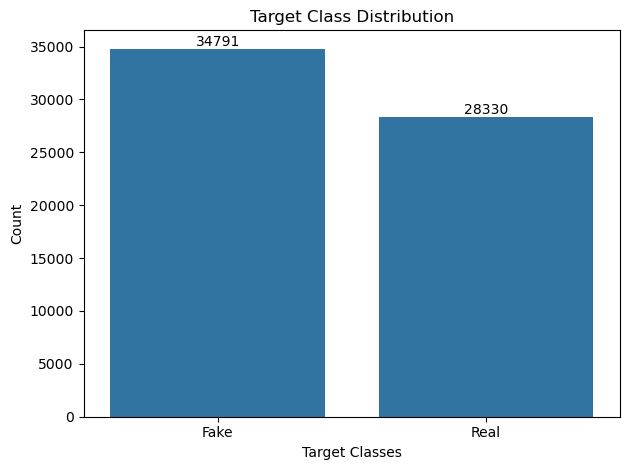

In [17]:
ax= sns.barplot(x=data['label'].value_counts().index,y=data['label'].value_counts().values)
plt.title("Target Class Distribution")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.xticks(ticks=[0,1],labels=['Fake','Real'])
plt.tight_layout()
for i, value in enumerate(data['label'].value_counts().values):
    ax.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=10)

In [18]:
import string
exclude =string.punctuation

In [21]:
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
def remove_punctuation(text):
    text=text.translate(str.maketrans('', '', exclude))
    return text.lower().strip()

In [23]:
data['text']=data['text'].apply(remove_punctuation)
data['title']=data['title'].apply(remove_punctuation)

In [24]:
data.head(5)

,title,text,label
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
2,unbelievable obama’s attorney general says mos...,now most of the demonstrators gathered last ni...,1
3,bobby jindal raised hindu uses story of christ...,a dozen politically active pastors came here f...,0
4,satan 2 russia unvelis an image of its terrify...,the rs28 sarmat missile dubbed satan 2 will re...,1
5,about time christian group sues amazon and spl...,all we can say on this one is it s about time ...,1


In [25]:
from bs4 import BeautifulSoup

def has_html_tags_bs(text):
    return text != BeautifulSoup(text, "html.parser").get_text()

In [26]:
check_html_text= data['text'].apply(has_html_tags_bs)
check_html_title = data['title'].apply(has_html_tags_bs)
print(check_html_text.value_counts())
print(check_html_title.value_counts())

text
False    63121
Name: count, dtype: int64
title
False    63121
Name: count, dtype: int64


In [27]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [28]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 5.5 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.8 MB 5.3 MB/s eta 0:00:03
     ---------- ----------------------------- 3.4/12.8 MB 5.7 MB/s eta 0:00:02
     --------------- ------------------------ 5.0/12.8 MB 6.0 MB/s eta 0:00:02
     ------------------- -------------------- 6.3/12.8 MB 6.2 MB/s eta 0:00:02
     ------------------------ --------------- 7.9/12.8 MB 6.4 MB/s eta 0:00:01
     ----------------------------- ---------- 9.4/12.8 MB 6.5 MB/s eta 0:00:01
     --------------------------------- ------ 10.7/12.8 MB 6.5 MB/s eta 0:00:01
     -------------------------------------- - 12.3/12.8 MB 6.6 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 6.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [30]:
import spacy
import os
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "textcat"])

def batch_lemmatize(texts, batch_size=800, n_process=4):
    results = []
    for doc in nlp.pipe(texts, batch_size=batch_size, n_process=n_process):
        lemmas = [
            token.lemma_.lower() for token in doc
            if token.is_alpha and not token.is_stop and len(token) > 2
        ]
        results.append(" ".join(lemmas))
    return results

In [31]:
texts = data["text"].astype(str).tolist()
titles = data["title"].astype(str).tolist()

In [32]:
data['clean_title'] = batch_lemmatize(titles)
data['clean_text'] = batch_lemmatize(texts)

In [33]:
pd.set_option("display.max_colwidth",None)
data.head(5)

title  \
0           law enforcement on high alert following threats against cops and whites on 911by blacklivesmatter and fyf911 terrorists video   
2  unbelievable obama’s attorney general says most charlotte rioters were “peaceful” protesters…in her home state of north carolina video   
3                                 bobby jindal raised hindu uses story of christian conversion to woo evangelicals for potential 2016 bid   
4                                          satan 2 russia unvelis an image of its terrifying new ‘supernuke’ – western world takes notice   
5                                                           about time christian group sues amazon and splc for designation as hate group   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
data.to_csv("New_data.csv",index=False)

In [5]:
data.sample(4)

,Unnamed: 0,title,text,label
28644,28644,"One Star Over, a Planet That Might Be Another ...",Another Earth could be circling the star right...,0
25856,25856,U.S. lawmakers delay bill on European data pri...,WASHINGTON (Reuters) - Legislation that would ...,0
63692,63692,Las Vegas May Become the New Amsterdam,Las Vegas May Become the New Amsterdam 11/07/2...,1
30873,30873,Muhammad Ali: The Champion Who Never Sold Out ...,Muhammad Ali was an ungentrified black man. Th...,0


## Using Text only for Vectorization

In [3]:
new_data = pd.read_csv(r"C:/Users/thaku/jupyter notebook datasets/Fake news/New_data.csv")

In [4]:
new_data.head()

,title,text,label,clean_title,clean_text
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1,law enforcement high alert follow threat cop w...,comment expect barack obama member fukyoflag b...
1,unbelievable obama’s attorney general says mos...,now most of the demonstrators gathered last ni...,1,unbelievable obama attorney general say charlo...,demonstrator gather night exercise constitutio...
2,bobby jindal raised hindu uses story of christ...,a dozen politically active pastors came here f...,0,bobby jindal raise hindu use story christian c...,dozen politically active pastor come private d...
3,satan 2 russia unvelis an image of its terrify...,the rs28 sarmat missile dubbed satan 2 will re...,1,satan russia unveli image terrifying new super...,sarmat missile dub satan replace fly mile sec ...
4,about time christian group sues amazon and spl...,all we can say on this one is it s about time ...,1,time christian group sue amazon splc designati...,time sue southern poverty law centeron tuesday...


In [5]:
new_data.dropna(subset=["clean_text","clean_title"],inplace=True)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [9]:
model_NB= Pipeline([("CountVectorizer",CountVectorizer()),
                   ("classification",MultinomialNB())])

In [10]:
x_train,x_test,y_train,y_test = train_test_split(new_data["clean_text"],new_data["label"],test_size=0.2,random_state=1)

In [11]:
x_train

28538    washington reuters russia ambassador washingto...
41663    bad day donald trump conservative racist mediu...
29357    tunis reuters tunisia navy rescue migrant incl...
61598    analyze real time second presidential debate d...
32818    cleveland reuters woman arrest tuesday climb f...
                               ...                        
32848    washington secretly arrest national security a...
5258     berkeley calif fire burn cradle free speech fu...
12316    liz harrington writer washington free beacon a...
33342    cairo reuters saudile military coalition say s...
63088    change doesn change truth female genital mutil...
Name: clean_text, Length: 50026, dtype: object

In [12]:
param_grid = {
    'CountVectorizer__max_df': [0.8, 1.0],
    'CountVectorizer__min_df': [2, 5],
    'CountVectorizer__ngram_range': [(1, 1), (1, 2)],
    'CountVectorizer__max_features': [10000, 20000],
    'classification__alpha': [0.1, 0.5, 1.0]
}

In [14]:
random_search = RandomizedSearchCV(
    model_NB,
    param_distributions=param_grid,
    n_iter=24,          
    scoring='accuracy', 
    cv=3,
    verbose=2,
    n_jobs=4,
    random_state=1
)
random_search.fit(x_train, y_train)
print("Best Params:", random_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Params: {'classification__alpha': 0.1, 'CountVectorizer__ngram_range': (1, 2), 'CountVectorizer__min_df': 2, 'CountVectorizer__max_features': 20000, 'CountVectorizer__max_df': 1.0}


In [18]:
y_predict = random_search.predict(x_test)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      6940
           1       0.86      0.89      0.87      5567

    accuracy                           0.89     12507
   macro avg       0.88      0.89      0.88     12507
weighted avg       0.89      0.89      0.89     12507



In [29]:
pipeline2 = Pipeline([("CountVectorizer",CountVectorizer(max_df=1.0,min_df=2,max_features=35000,ngram_range=(1,2))),
                   ("classification",MultinomialNB(alpha=0.09))])

In [30]:
pipeline2.fit(x_train,y_train)

Pipeline(steps=[('CountVectorizer',
                 CountVectorizer(max_features=35000, min_df=2,
                                 ngram_range=(1, 2))),
                ('classification', MultinomialNB(alpha=0.09))])

In [31]:
y_predict = pipeline2.predict(x_test)

In [32]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6940
           1       0.87      0.89      0.88      5567

    accuracy                           0.89     12507
   macro avg       0.89      0.89      0.89     12507
weighted avg       0.89      0.89      0.89     12507



## using Text and Title for Vectorization

In [33]:
new_data["Content"]=new_data["clean_title"]+" "+new_data["clean_text"]

In [34]:
new_data

,title,text,label,clean_title,clean_text,Content
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1,law enforcement high alert follow threat cop w...,comment expect barack obama member fukyoflag b...,law enforcement high alert follow threat cop w...
1,unbelievable obama’s attorney general says mos...,now most of the demonstrators gathered last ni...,1,unbelievable obama attorney general say charlo...,demonstrator gather night exercise constitutio...,unbelievable obama attorney general say charlo...
2,bobby jindal raised hindu uses story of christ...,a dozen politically active pastors came here f...,0,bobby jindal raise hindu use story christian c...,dozen politically active pastor come private d...,bobby jindal raise hindu use story christian c...
3,satan 2 russia unvelis an image of its terrify...,the rs28 sarmat missile dubbed satan 2 will re...,1,satan russia unveli image terrifying new super...,sarmat missile dub satan replace fly mile sec ...,satan russia unveli image terrifying new super...
4,about time christian group sues amazon and spl...,all we can say on this one is it s about time ...,1,time christian group sue amazon splc designati...,time sue southern poverty law centeron tuesday...,time christian group sue amazon splc designati...
...,...,...,...,...,...,...
63116,wikileaks email shows clinton foundation funds...,an email released by wikileaks on sunday appea...,1,wikileak email show clinton foundation fund la...,email release wikileak sunday appear aide bill...,wikileak email show clinton foundation fund la...
63117,russians steal research on trump in hack of us...,washington reuters hackers believed to be wor...,0,russians steal research trump hack democratic ...,washington reuters hacker believe work russian...,russians steal research trump hack democratic ...
63118,watch giuliani demands that democrats apologiz...,you know because in fantasyland republicans ne...,1,watch giuliani demand democrats apologize trum...,know fantasyland republican question citizensh...,watch giuliani demand democrats apologize trum...
63119,migrants refuse to leave train at refugee camp...,migrants refuse to leave train at refugee camp...,0,migrant refuse leave train refugee camp hungary,migrant refuse leave train refugee camp hungar...,migrant refuse leave train refugee camp hungar...


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline3 = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=5,max_df=0.75,max_features=None,ngram_range=(1,2))),
    ('clf', MultinomialNB(alpha=0.09))
])

In [74]:
x_train,x_test,y_train,y_test = train_test_split(new_data["Content"],new_data["label"],test_size=0.2,random_state=33)

In [75]:
x_train

53198    watch democrat trump impeachment credible reas...
48380    man attack lexington student machete republica...
57426    video delusional obama restore respected count...
6485     wrench decision black history flood intertwine...
60041    congress start undo obamaera regulation month ...
                               ...                        
27568    nigeria battle boko haram scar land people new...
585      border patrol chief morgan ask leave agency wa...
38999    lawmaker question businessman trump tower meet...
2466     watch sarah silverman hilariously demolish tru...
23836    netanyahu say respected western opinion leader...
Name: Content, Length: 50026, dtype: object

In [76]:
pipeline3.fit(x_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.75, min_df=5, ngram_range=(1, 2))),
                ('clf', MultinomialNB(alpha=0.09))])

In [77]:
y_predict = pipeline3.predict(x_test)

In [78]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6886
           1       0.88      0.90      0.89      5621

    accuracy                           0.90     12507
   macro avg       0.90      0.90      0.90     12507
weighted avg       0.90      0.90      0.90     12507



## Classification Using SVC, Logistic regression and Random Forest Classifier with TFID vectorization


In [80]:
tfid_vector =TfidfVectorizer(min_df=5,max_df=0.75,max_features=None,ngram_range=(1,2))

In [82]:
x = tfid_vector.fit_transform(new_data["Content"])
x_train,x_test,y_train,y_test = train_test_split(x,new_data["label"],test_size=0.2,random_state=44)

starting to train models
model name:  Logistic Regression
model name:  SVM
model name:  Random Forest
                 Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Logistic Regression        0.969696       0.946190         0.969697   
1                  SVM        0.998121       0.955545         0.998121   
2        Random Forest        1.000000       0.917566         1.000000   

   Test Precision  Train Recall  Test Recall  Train F1 Score  Test F1 Score  
0        0.946190      0.969696     0.946190        0.969682       0.946152  
1        0.955533      0.998121     0.955545        0.998121       0.955530  
2        0.918519      1.000000     0.917566        1.000000       0.917234  


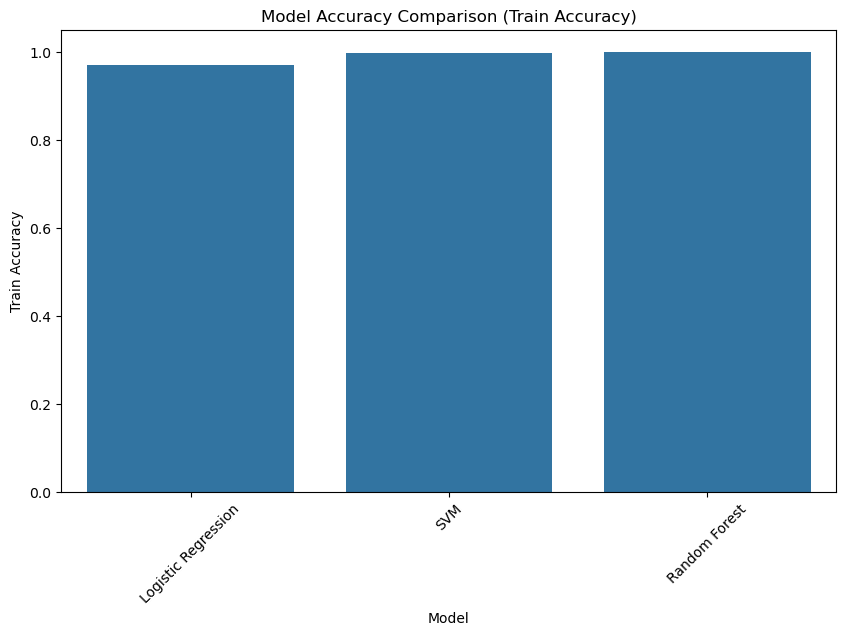

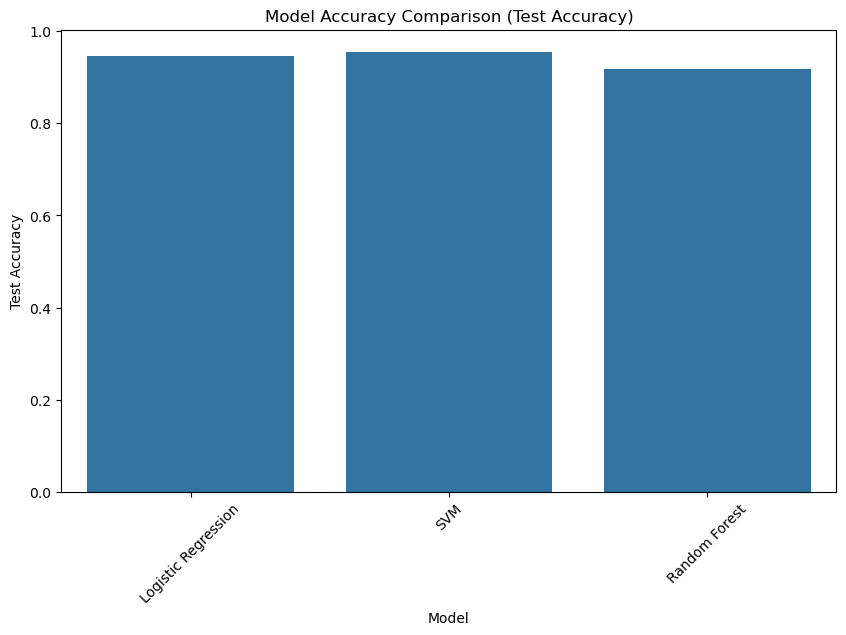

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
}
print("starting to train models")
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    
   
    y_train_pred = model.predict(x_train)
    

    y_test_pred = model.predict(x_test)

    results.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Train Precision": precision_score(y_train, y_train_pred, average='weighted'),
        "Test Precision": precision_score(y_test, y_test_pred, average='weighted'),
        "Train Recall": recall_score(y_train, y_train_pred, average='weighted'),
        "Test Recall": recall_score(y_test, y_test_pred, average='weighted'),
        "Train F1 Score": f1_score(y_train, y_train_pred, average='weighted'),
        "Test F1 Score": f1_score(y_test, y_test_pred, average='weighted')
    })
    print("model name: ", name)

results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Train Accuracy", data=results_df)
plt.title("Model Accuracy Comparison (Train Accuracy)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Test Accuracy", data=results_df)
plt.title("Model Accuracy Comparison (Test Accuracy)")
plt.xticks(rotation=45)
plt.show()